## Loading Libraries

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading dataset

In [5]:
# We first load our iris dataset into a dataframe
iris_data = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

#Let's check first values
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Let's check the unique species we have
unique_species = iris_data['species'].unique()
print(unique_species)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
# lets convert the species into numbers so that we can work with them
iris_data['species'] = iris_data['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2 })

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# checking for null values
print(iris_data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [17]:
# Let's standardize values in each of the columns

# We apply MinMaxscaling
scaler = MinMaxScaler()

scaler.fit(iris_data[["sepal_length"]])
iris_data['sepal_length'] = scaler.transform(iris_data[['sepal_length']])

scaler.fit(iris_data[["sepal_width"]])
iris_data['sepal_width'] = scaler.transform(iris_data[['sepal_width']])

scaler.fit(iris_data[["petal_length"]])
iris_data['petal_length'] = scaler.transform(iris_data[['petal_length']])

scaler.fit(iris_data[["petal_width"]])
iris_data['petal_width'] = scaler.transform(iris_data[['petal_width']])

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


## Splitting the data to train and test sets

In [19]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #parameters/features
y = iris_data['species']  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% testing

## Training with k-means algorithm

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42) # we already know we have 3 clusters from the unique values we saw
kmeans.fit(X_train) # we train with the training data of the features

# Predict the clusters on the test set
y_pred_clusters = kmeans.predict(X_test) #then we predict on the testing set

y_pred_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0,
       0], dtype=int32)

## Ajusting and mapping to correct labels

In [31]:
# The idea is the k - means assigns a random number to the clusters obtained, but we specifically put iris setosa as 0, iris versicolor as 1 and vriginica as 2
# so we have to match the new labels outputted by k means to those that we have

# we do this by looking at the majority species in each of the clusters specified by the k means cluster

clustered_data = pd.DataFrame({
    'cluster': y_pred_clusters,
    'species': y_test
})

# Find the majority species for each cluster
cluster_species_mapping = {}
for cluster in range(3):
    # Get the subset of the data where the cluster is assigned
    species_in_cluster = clustered_data[clustered_data['cluster'] == cluster]['species']
    majority_species = species_in_cluster.mode()[0]  # Find the most frequent species
    cluster_species_mapping[cluster] = majority_species
    
print("Cluster to species mapping:", cluster_species_mapping) # setosa to 0 , 1 to viginica, and 2 to versicolor

Cluster to species mapping: {0: 0, 1: 2, 2: 1}


## Calculating accuracy and comparing actual and predicted values

In [32]:
# Mapping predicted clusters to species
y_pred_species = [cluster_species_mapping[cluster] for cluster in y_pred_clusters]

# Now y_pred_species will contain the species predictions for each sample


# We can now calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred_species)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Building a comparison table between actual and predicted values
comparison = pd.DataFrame({'Actual Species': y_test, 'Predicted Species': y_pred_species})
print(comparison.head(15))

Accuracy: 88.89%
     Actual Species  Predicted Species
73                1                  1
18                0                  0
118               2                  2
78                1                  1
76                1                  1
31                0                  0
64                1                  1
141               2                  2
68                1                  1
82                1                  1
110               2                  2
12                0                  0
36                0                  0
9                 0                  0
19                0                  0


## Some visualizations of the relations between the features and how the flowers are clustered

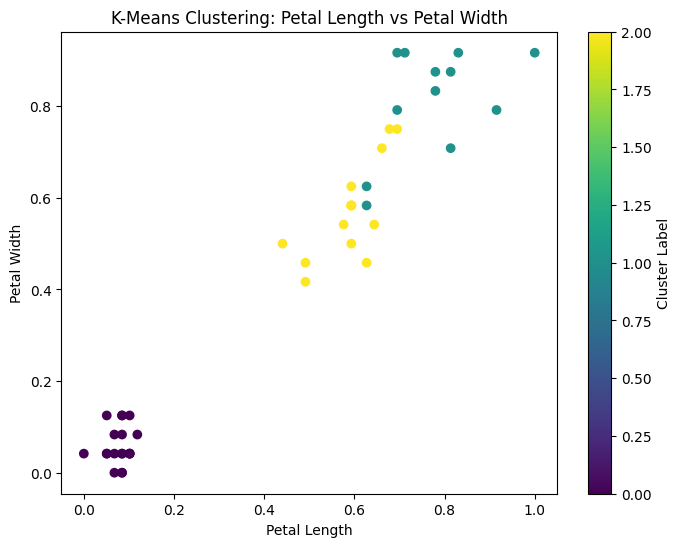

In [38]:
# We check for the petal lenght and petal width 
plt.figure(figsize=(8, 6))
plt.scatter(X_test['petal_length'], X_test['petal_width'], c=y_pred_clusters, cmap='viridis', marker='o')
plt.title("K-Means Clustering: Petal Length vs Petal Width")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster Label')# Colorbar to show cluster numbers
plt.savefig("petal_length_&_petal_width.png")
plt.show()


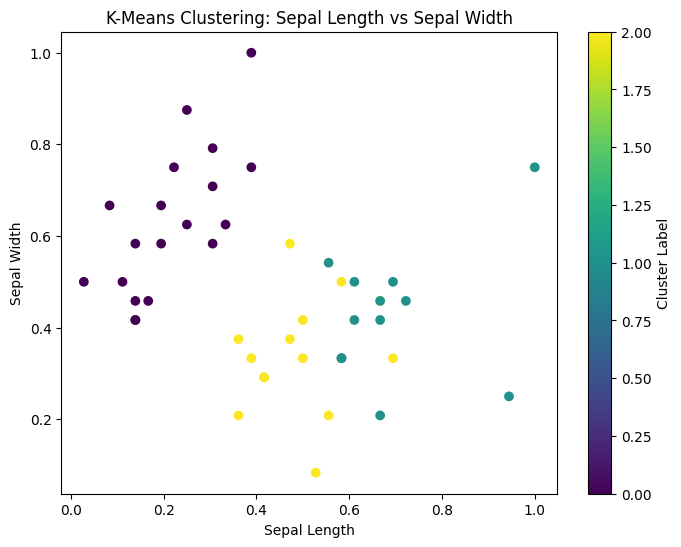

In [39]:
# Now we check fot the sepal length and width
plt.figure(figsize=(8, 6))
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_pred_clusters, cmap='viridis', marker='o')
plt.title("K-Means Clustering: Sepal Length vs Sepal Width")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster Label')  # Colorbar to show cluster numbers
plt.savefig("sepal_length_&_sepal_width.png")
plt.show()
